In [2]:
# Trying synapses fro the main cortex model. 
# Author:   Gressa
# Date:     19.09.2021

from brian2 import * 
from brian2tools import * 



In [3]:
# Main Equation to use in models

main_eqs = Equations('''

    dv/dt = 1/C*(k*(v - vr)*(v - vt) - u + I ) / tau : 1
    du/dt = 1/tau*a*(b * (v - vr) - u)  : 1
    I : 1
''')


WARNING    "u" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 670. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Text(0.5, 1.0, 'LS model')

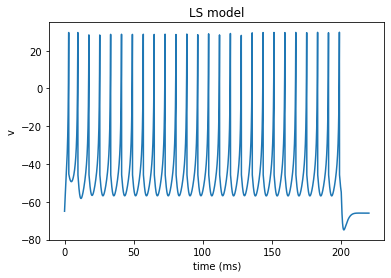

In [4]:
### ONE CELL


### nb1 - LS (Late Spiking Neuron Model)
defaultclock.dt = 0.01*ms
start_scope()
# Paramaters
k = 0.3
C = 20

vr = -66
vt = -40

a = 0.17
b = 5
c = -45
# Previously using vr instead of d worked as well. (in the reset u equation)
d = 100

u = 670
tau = 0.5*ms

# Neuron Group

N = NeuronGroup(1, main_eqs, threshold='v>30',
                reset='v = c; u = u + d ', method='euler')

N.v = -65
N.I = 200

# Monitors

mon = StateMonitor(N, 'v', record=True)

run(200*ms)

N.I = 0

run(20*ms)

brian_plot(mon)
title('LS model')


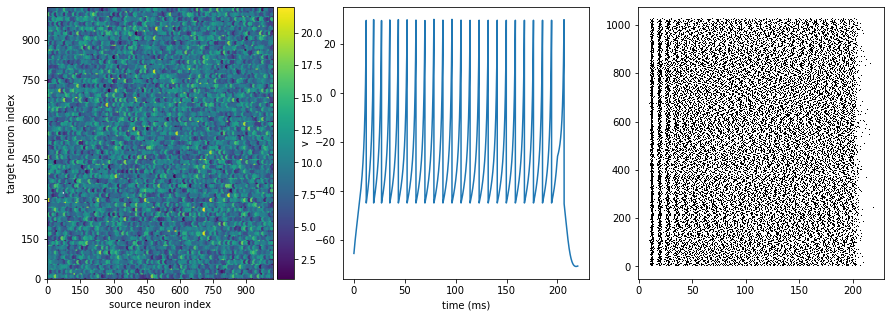

In [26]:
start_scope()

### nb1 - LS (Late Spiking Neuron Model)
defaultclock.dt = 0.01*ms
start_scope()
# Paramaters
k = 0.3
C = 20

vr = -66
vt = -40

a = 0.17
b = 5
c = -45
# Previously using vr instead of d worked as well. (in the reset u equation)
d = 100

u = 670
tau = 2*ms          #Tau has been increased to see the change in potenital better. Cell's were spiking too fast. Probably because of too much excitation. 


### NEURON GROUP

numN = 1024         #Number of neurons
p_nb1 = 10.1/100    #Probablity of connection

N1 = NeuronGroup(numN, main_eqs, threshold='v>30',
                 reset='v = c; u = u + vr ',  method='euler')

N1.v = '-65  + randn()'
N1.I = '200 - 10*randn()'

S = Synapses(N1, N1)

S.connect(p = p_nb1, condition='i!=j')

M1 = StateMonitor(N1,'v', record = 0)
spM = SpikeMonitor(N1)

run(200*ms)

N1.I = 0
run(20*ms)

figure(figsize=(15, 5))

subplot(131)
brian_plot(S)

subplot(132)
brian_plot(M1)

subplot(133)
plot(spM.t/ms, spM.i, 'k,')